In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generamos el dataset a partir del método make blobs

In [2]:
x, y = make_blobs(n_samples=500, random_state=0)

In [5]:
df = pd.DataFrame(x)

In [7]:
df.describe()

,0,1
count,500.000000,500.000000
mean,0.431738,2.679944
std,1.732716,1.799166
min,-4.109701,-2.148479
25%,-1.003387,1.253754
50%,0.574957,2.793273
75%,1.752792,4.072161
max,4.751492,6.560511


In [10]:
k_means_model = KMeans(n_init=10)

In [11]:
k_means_model.fit(df)

KMeans(n_init=10)

In [12]:
# Un modelo no supervisado se basa en la agrupación de elementos, para esto genera un conjunto de etiquetas
k_means_model.labels_

array([3, 1, 5, 7, 1, 3, 7, 1, 1, 7, 1, 1, 5, 7, 7, 7, 2, 3, 5, 3, 0, 6,
       0, 1, 7, 5, 6, 7, 7, 1, 5, 3, 4, 1, 6, 6, 0, 0, 6, 6, 5, 3, 3, 0,
       0, 4, 6, 3, 5, 5, 7, 3, 4, 4, 1, 5, 2, 6, 3, 6, 0, 7, 6, 2, 0, 5,
       6, 2, 7, 4, 5, 4, 4, 1, 0, 1, 0, 2, 6, 3, 3, 4, 5, 7, 5, 2, 5, 5,
       7, 5, 7, 3, 0, 4, 7, 0, 5, 7, 7, 7, 0, 5, 5, 3, 4, 6, 3, 0, 3, 6,
       4, 4, 6, 7, 5, 2, 1, 0, 6, 5, 5, 0, 7, 1, 5, 3, 5, 3, 7, 4, 0, 3,
       1, 2, 7, 0, 5, 1, 7, 7, 3, 4, 5, 2, 7, 4, 7, 2, 0, 4, 0, 7, 4, 3,
       0, 4, 7, 6, 7, 7, 0, 7, 5, 5, 5, 0, 7, 0, 4, 0, 1, 1, 0, 3, 3, 1,
       1, 6, 6, 2, 0, 6, 5, 5, 6, 0, 3, 0, 7, 1, 5, 7, 6, 0, 3, 1, 2, 7,
       5, 2, 1, 2, 7, 4, 5, 6, 6, 6, 5, 5, 3, 6, 6, 5, 7, 3, 5, 3, 5, 5,
       0, 1, 0, 2, 3, 3, 4, 0, 1, 4, 7, 5, 7, 2, 1, 5, 7, 2, 3, 3, 4, 0,
       6, 2, 3, 1, 5, 1, 5, 5, 2, 1, 7, 7, 1, 5, 4, 2, 1, 6, 0, 7, 7, 0,
       6, 7, 7, 0, 5, 0, 0, 5, 0, 3, 7, 0, 3, 0, 6, 6, 6, 5, 0, 7, 3, 4,
       4, 5, 5, 6, 2, 5, 1, 4, 7, 0, 5, 3, 1, 0, 3,

### Ahora explicaremos de forma gráfica que significa esto

In [13]:
# Para entender un poco funciona, conozcamos a los centroides
k_means_model.cluster_centers_

array([[ 2.71671991,  1.42707101],
       [-1.63506553,  3.95846267],
       [ 1.98156127, -0.4745989 ],
       [ 1.72426871,  4.58018405],
       [ 0.13523046,  5.21890254],
       [-1.92834886,  2.29047361],
       [ 0.8917707 ,  0.79110823],
       [ 0.31936769,  3.14827033]])

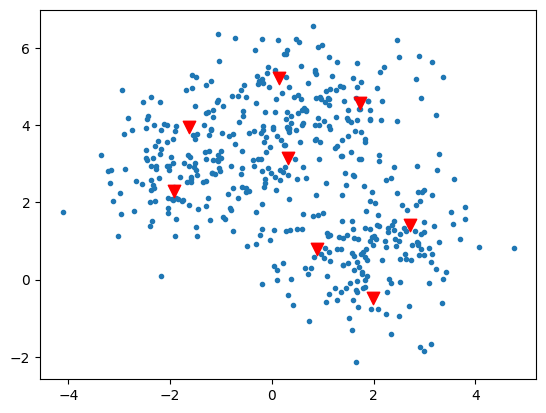

In [15]:
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], marker='.')
plt.scatter(k_means_model.cluster_centers_[:, 0], k_means_model.cluster_centers_[:, 1], marker='v', c='red', s=80)
plt.show()

## La técnica de Elbow

In [16]:
centers = range(1, 14)

In [20]:
"""
clusters = []
for center in centers:
    cluster.append(KMeans(n_clusters= center))
"""
clusters = [KMeans(n_clusters=center, n_init=10) for center in centers]

In [21]:
scores = [clusters[index].fit(df).score(df) for index in range(len(clusters))]

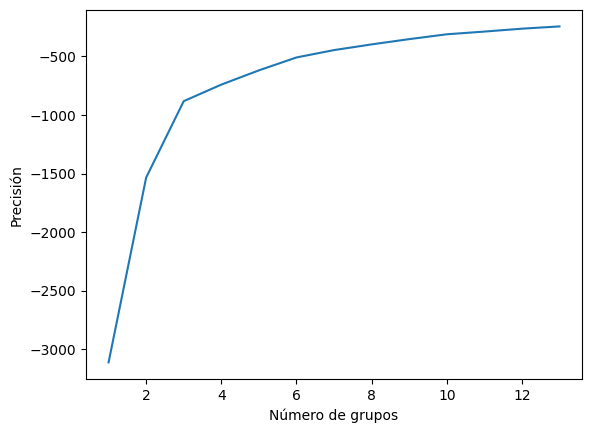

In [24]:
# Procedemos a graficar la curva del codo
plt.plot(centers, scores)
plt.xlabel('Número de grupos')
plt.ylabel('Precisión')
plt.show()

In [25]:
y

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,